# Act Report

Explored the cleaned data to gain insights on the following questions: 

1. Is the tweet that received the most favorites count also the tweet that was retweeted most?
2. What day of the week were most of the tweets created? 
3. What are some of the common words used in the top tweets?

# Reference

https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.bar.html  
https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python  
https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer  

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 
sns.set(style="whitegrid", color_codes=True)

In [2]:
# Source: https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python
stopwords = set(STOPWORDS)  # set the stop words

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [3]:
# read the main tweet dataset csv
df_main=pd.read_csv('main_twitter_dataset.csv')

# Question 1: Is the tweet that received the most favorites count also the tweet that was retweeted most?

In [4]:
tmp=df_main.sort_values(by=['favorite_count','retweet_count'],
                        ascending=False)[['tweet_id','favorite_count','retweet_count']].head(10)

print('Table of Tweet IDs with the top 10 favorites count and retweets count')

tmp

Table of Tweet IDs with the top 10 favorites count and retweets count


,tweet_id,favorite_count,retweet_count
872,744234799360020481,162143.0,84152.0
350,822872901745569793,142138.0,48561.0
119,866450705531457537,123352.0,36023.0
449,807106840509214720,121999.0,60430.0
912,739238157791694849,121443.0,62781.0
63,879415818425184262,105136.0,44023.0
376,819004803107983360,92986.0,40642.0
147,859196978902773760,91694.0,31340.0
103,870374049280663552,82744.0,26514.0
451,806629075125202948,81404.0,38968.0


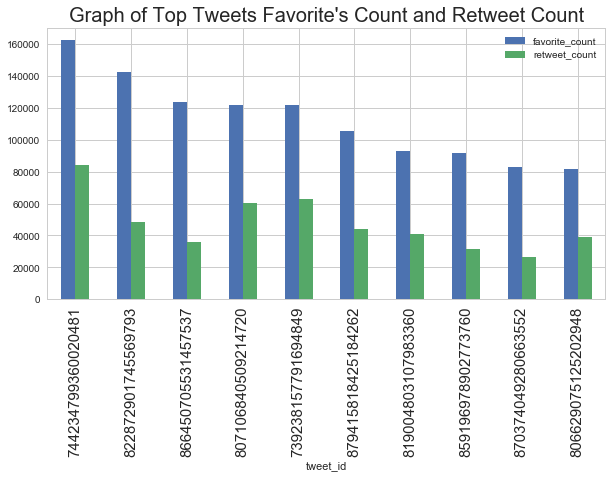

In [5]:
ax=tmp.plot.bar(x='tweet_id',rot=0,subplots=False,figsize=(10,5))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=15)
ax.set_title("Graph of Top Tweets Favorite's Count and Retweet Count", fontsize=20);

From the graph above it can be seen that the tweet that received the most favorite's count was not the tweet that was retweeted 
most.

Tweet corresponding to the tweet id 822872901745569793 received the highest favorites count while tweet corresponding to tweet id 744234799360020481 received the highest retweet count. 

It can also be observed that the top 10 tweets:
1. Favorites count was more than 80,000
2. Retweets count was more than 20,000

# Question 2: What day of the week were most of the tweets created? 

In [6]:
tmp=df_main.groupby('timestamp_weekday').size().reset_index(name = "Number of Tweets")

print('Table of number of Tweets by weekday')

tmp

Table of number of Tweets by weekday


,timestamp_weekday,Number of Tweets
0,0,359
1,1,328
2,2,322
3,3,307
4,4,307
5,5,287
6,6,277


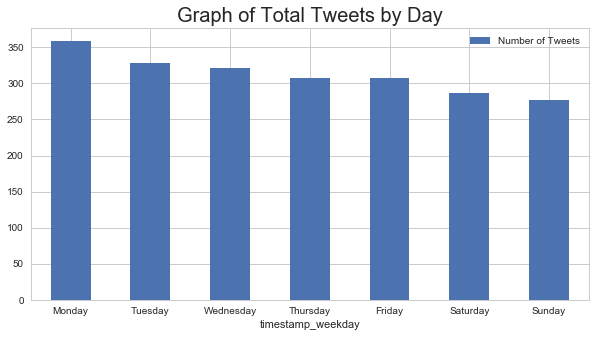

In [7]:
# create a dictionary for mapping
di_day = {'0':'Monday','1':'Tuesday','2':'Wednesday','3':'Thursday','4':'Friday','5':'Saturday','6':'Sunday'}

# map the dictionary 
tmp['timestamp_weekday']=tmp['timestamp_weekday'].astype(str).replace(di_day)

# plot the barplot
ax=tmp.plot.bar(x='timestamp_weekday',rot=0,subplots=False,figsize=(10,5))
ax.set_title("Graph of Total Tweets by Day", fontsize=20);

From the above graph it can be observed that the highest number of tweets were created on Monday. It is interesting to note that the number of tweets tapered down towards the weekend.  

# Question 3: What are some of the common words used in the top tweets?

In [8]:
# extract the top tweets
tmp=df_main.sort_values(by=['favorite_count'],ascending=False)[['text']].head(10)

print('<<Below are text corresponding to the top 10 tweets that received the most favorites count>> \n')

#view the top tweets
for i in tmp['text']:
    print(i)

<<Below are text corresponding to the top 10 tweets that received the most favorites count>> 

Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc
This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr
This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d
Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC
This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY
This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1
We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. 

Word cloud of some of the common words in top 10 tweets that received the most favorites count


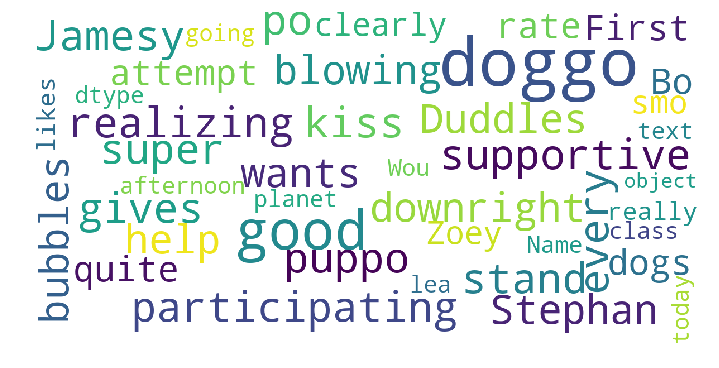

In [9]:
print('Word cloud of some of the common words in top 10 tweets that received the most favorites count' )
show_wordcloud(tmp['text'])

From the word cloud, it can be observed that the top 10 tweets contained some interesting text such as:  
help, stand, kiss, participating, supportive, gives, wants, quite.